Jupyter notebook to see whether or not Ryan Day is better during the daytime. Data was scraped from [football-reference.com](https://www.sports-reference.com/cfb/schools/ohio-state/2019-schedule.html) using `pandas.read_html`

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

from dateutil.parser import parse

In [2]:
# Football re
data_path = os.path.join("..", "data", "results-tOSU-cleaned.csv")
plot_path = os.path.join("..", "plots")

df = pd.read_csv(data_path)

df = df.drop(["Unnamed: 8", "Unnamed: 5"], axis=1)

df.head()

,G,Date,Time,Day,School,Opponent,Conf,Pts,Opp,W,L,Streak,Notes
0,1,"Sep 1, 2018",12:00 PM,Sat,(5) Ohio State,Oregon State,Pac-12,77,31,1,0,W 1,NaN
1,2,"Sep 8, 2018",3:30 PM,Sat,(4) Ohio State,Rutgers,Big Ten,52,3,2,0,W 2,NaN
2,3,"Sep 15, 2018",8:00 PM,Sat,(4) Ohio State,(15) Texas Christian,Big 12,40,28,3,0,W 3,NaN
3,4,"Sep 22, 2018",3:30 PM,Sat,(4) Ohio State,Tulane,American,49,6,4,0,W 4,NaN
4,5,"Sep 29, 2018",7:30 PM,Sat,(4) Ohio State,(9) Penn State,Big Ten,27,26,5,0,W 5,NaN


In [3]:
# Standardizing datetime column using dateutil.parser.parse
df['DateTime_str'] =  df['Time'] + " " + df['Date']
df['DateTime'] = df['DateTime_str'].apply(parse)
df = df.drop('DateTime_str', axis=1)

# Using military time because it's better
df['StartTime'] = df['DateTime'].dt.hour

df.head()

,G,Date,Time,Day,School,Opponent,Conf,Pts,Opp,W,L,Streak,Notes,DateTime,StartTime
0,1,"Sep 1, 2018",12:00 PM,Sat,(5) Ohio State,Oregon State,Pac-12,77,31,1,0,W 1,NaN,2018-09-01 12:00:00,12
1,2,"Sep 8, 2018",3:30 PM,Sat,(4) Ohio State,Rutgers,Big Ten,52,3,2,0,W 2,NaN,2018-09-08 15:30:00,15
2,3,"Sep 15, 2018",8:00 PM,Sat,(4) Ohio State,(15) Texas Christian,Big 12,40,28,3,0,W 3,NaN,2018-09-15 20:00:00,20
3,4,"Sep 22, 2018",3:30 PM,Sat,(4) Ohio State,Tulane,American,49,6,4,0,W 4,NaN,2018-09-22 15:30:00,15
4,5,"Sep 29, 2018",7:30 PM,Sat,(4) Ohio State,(9) Penn State,Big Ten,27,26,5,0,W 5,NaN,2018-09-29 19:30:00,19


In [27]:
# Creating wins & day games column

df['Result'] = np.where(df['Pts'] > df['Opp'], "Win", "Loss")
df['GameType'] = np.where(df['StartTime'] < 18, "Day", "Night")
df

,G,Date,Time,Day,School,Opponent,Conf,Pts,Opp,W,L,Streak,Notes,DateTime,StartTime,Result,GameType,Margin,OppRanking,WinBin
0,1,"Sep 1, 2018",12:00 PM,Sat,(5) Ohio State,Oregon State,Pac-12,77,31,1,0,W 1,NaN,2018-09-01 12:00:00,12,Win,Day,1,unranked,1
1,2,"Sep 8, 2018",3:30 PM,Sat,(4) Ohio State,Rutgers,Big Ten,52,3,2,0,W 2,NaN,2018-09-08 15:30:00,15,Win,Day,2,unranked,1
2,3,"Sep 15, 2018",8:00 PM,Sat,(4) Ohio State,(15) Texas Christian,Big 12,40,28,3,0,W 3,NaN,2018-09-15 20:00:00,20,Win,Night,3,ranked,1
3,4,"Sep 22, 2018",3:30 PM,Sat,(4) Ohio State,Tulane,American,49,6,4,0,W 4,NaN,2018-09-22 15:30:00,15,Win,Day,4,unranked,1
4,5,"Sep 29, 2018",7:30 PM,Sat,(4) Ohio State,(9) Penn State,Big Ten,27,26,5,0,W 5,NaN,2018-09-29 19:30:00,19,Win,Night,5,ranked,1
5,6,"Oct 6, 2018",4:00 PM,Sat,(3) Ohio State,Indiana,Big Ten,49,26,6,0,W 6,NaN,2018-10-06 16:00:00,16,Win,Day,6,unranked,1
6,7,"Oct 13, 2018",12:00 PM,Sat,(3) Ohio State,Minnesota,Big Ten,30,14,7,0,W 7,NaN,2018-10-13 12:00:00,12,Win,Day,7,unranked,1
7,8,"Oct 20, 2018",7:30 PM,Sat,(2) Ohio State,Purdue,Big Ten,20,49,7,1,L 1,NaN,2018-10-20 19:30:00,19,Loss,Night,6,unranked,0
8,9,"Nov 3, 2018",12:00 PM,Sat,(8) Ohio State,Nebraska,Big Ten,36,31,8,1,W 1,NaN,2018-11-03 12:00:00,12,Win,Day,7,unranked,1
9,10,"Nov 10, 2018",12:00 PM,Sat,(8) Ohio State,(24) Michigan State,Big Ten,26,6,9,1,W 2,NaN,2018-11-10 12:00:00,12,Win,Day,8,ranked,1


In [28]:
day_games = df.loc[df['StartTime'] < 19]
night_games = df.loc[df['StartTime'] > 19]


In [29]:
results = df.groupby(["GameType", "Result"])['G'].count()
results

GameType  Result
Day       Loss       2
          Win       30
Night     Loss       3
          Win       14
Name: G, dtype: int64

In [30]:
# Let's calculate those win %s
day_wins = results["Day"]["Win"]
day_losses = results["Day"]["Loss"]

nite_wins = results["Night"]["Win"]
nite_losses = results["Night"]["Loss"]

day_win_pct = 100 * (day_wins / (day_wins + day_losses))
nite_win_pct = 100 * (nite_wins / (nite_wins + nite_losses))

print(f"Ryan Day daytime win %: {day_win_pct}%")
print(f"Ryan Day nighttime win %: {nite_win_pct}%")

Ryan Day daytime win %: 93.75%
Ryan Day nighttime win %: 82.35294117647058%


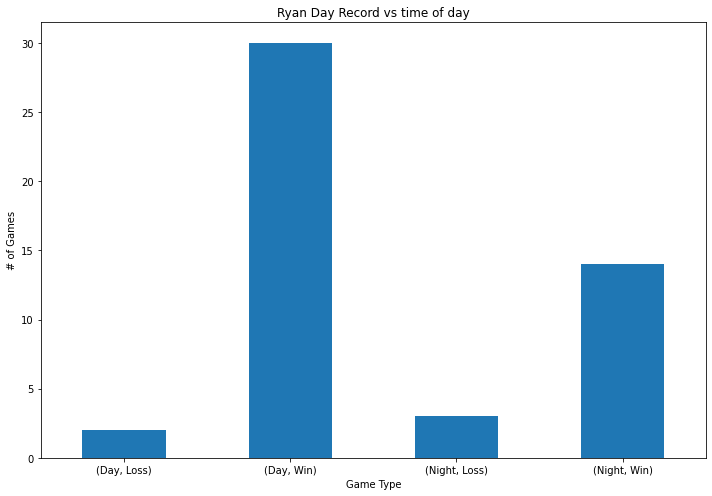

In [23]:
# Taking a look at raw

ax = results.plot(kind='bar',
                  title='Ryan Day Record vs time of day', ylabel='# of Games',
                  xlabel='Game Type', figsize=(10, 7))
plt.xticks(range(0,len(results.index)), rotation=0)
plt.tight_layout()
plt.savefig(os.path.join(plot_path, "record-vs-time.png"))



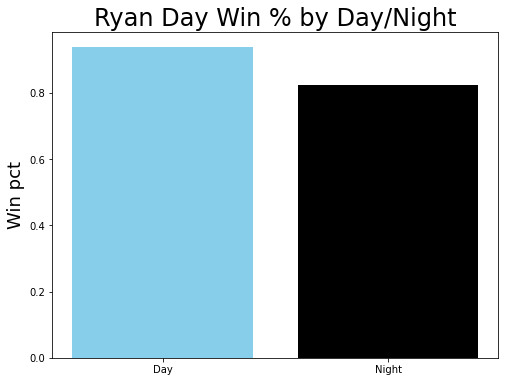

In [25]:
# Plotting win %s
f,ax = plt.subplots(figsize=(8,6))
# f.tight_layout()
ax.bar(["Day", "Night"], [day_win_pct/100, nite_win_pct/100], color=['#87CEEB', "#000000"])

ax.set_title("Ryan Day Win % by Day/Night", fontsize=24)
ax.set_ylabel("Win pct", fontsize=18)

f.savefig(os.path.join(plot_path, "win-pct-dayNight.pdf"), bbox_inches="tight")

In [10]:
# Would like to plot margin of victory by start time
df["Margin"] = df["W"] - df["L"]
avg_margin = df.groupby(["Time"])["Margin"].mean()
avg_margin

Time
12:00 PM     6.000000
3:30 PM      4.571429
4:00 PM      6.000000
5:00 PM     10.500000
7:30 PM      4.444444
8:00 PM      7.571429
8:30 PM      7.000000
Name: Margin, dtype: float64

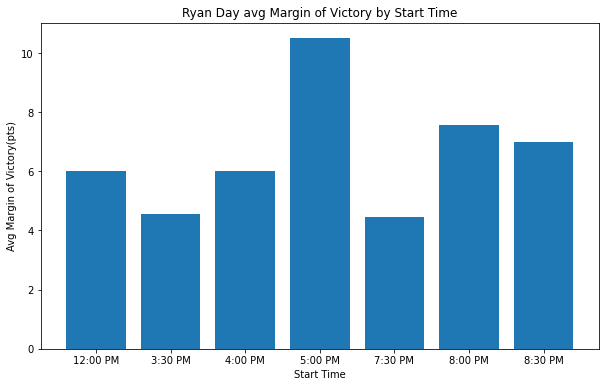

In [11]:

f,ax = plt.subplots(figsize=(10,6))
ax.bar(avg_margin.index, avg_margin)
ax.set_title("Ryan Day avg Margin of Victory by Start Time")
ax.set_xlabel("Start Time")
ax.set_ylabel("Avg Margin of Victory(pts)")


f.savefig(os.path.join(plot_path, "mov-by-startTime.png"))

### SOS

Does tOSU (and by extension Mr. Day) play tougher opponents at night. While [rankings are not perfect](https://bleacherreport.com/articles/837530-college-football-rankings-7-places-where-polls-got-it-wrong-again), they do give us a sense of how difficult an opponent will be.

In [12]:
import re
import string

def get_ranking(s):
    '''Quick function to get a teams ranking (if ranked) from our DF names'''
    ranking = re.search(r'\((.*?)\)',s)
    # Miami of Ohio is the bane of my existence
    if (ranking) and "OH" not in ranking.group(0):
        return 'ranked'
    else:
        return "unranked"
    

df['OppRanking'] = df['Opponent'].apply(get_ranking)

In [13]:
ranking_results = df.groupby(["OppRanking", "GameType"])['G'].count()
ranking_results.sort_index()

OppRanking  GameType
ranked      Day         12
            Night       10
unranked    Day         20
            Night        7
Name: G, dtype: int64

It makes sense his daytime win % would be a bit inflated, as ranked matchups typically are played in primetime

In [26]:
# What's his win % against ranked vs unranked at daytime
ranked_wins = df.loc[(df['Result'] =='Win') &
                     (df['OppRanking']=='ranked') &
                     (df['GameType']=="Day")]
ranked_day_win_pct = len(ranked_wins) / len(df.loc[(df['OppRanking']=='ranked') &
                     (df['GameType']=="Day")])

unranked_wins = df.loc[(df['Result'] =='Win') &
                      (df['OppRanking']=='unranked') &
                      (df['GameType']=="Day")]
unranked_day_win_pct = len(unranked_wins) / len(df.loc[(df['OppRanking']=='unranked') & (df['GameType']=="Day")])

print(f"Ranked Daytime win %: {100 *ranked_day_win_pct}")
print(f"Unranked Daytime win %: {100 * unranked_day_win_pct}")

Ranked Daytime win %: 83.33333333333334
Unranked Daytime win %: 100.0


In [36]:
df.loc[(df["GameType"]=="Day") & (df["Result"]=="Loss")]

,G,Date,Time,Day,School,Opponent,Conf,Pts,Opp,W,L,Streak,Notes,DateTime,StartTime,Result,GameType,Margin,OppRanking,WinBin
37,2,"Sep 11, 2021",12:00 PM,Sat,(3) Ohio State,(12) Oregon,Pac-12,28,35,1,1,L 1,NaN,2021-09-11 12:00:00,12,Loss,Day,0,ranked,0
47,12,"Nov 27, 2021",12:00 PM,Sat,(2) Ohio State,(6) Michigan,Big Ten,27,42,10,2,L 1,NaN,2021-11-27 12:00:00,12,Loss,Day,8,ranked,0


In [32]:
# Same as above for nighttime
ranked_night_win_pct = len(ranked_wins) / len(df.loc[(df['OppRanking']=='ranked') &
                     (df['GameType']=="Night")])
unranked_wins = df.loc[(df['Result'] =='Win') &
                      (df['OppRanking']=='unranked') &
                      (df['GameType']=="Night")]
unranked_night_win_pct = len(unranked_wins) / len(df.loc[(df['OppRanking']=='unranked') & (df['GameType']=="Night")])

print(f"Ranked Nighttime win %: {100 *ranked_night_win_pct}")
print(f"Unranked Nighttime win %: {100 * unranked_night_win_pct}")

Ranked Nighttime win %: 100.0
Unranked Nighttime win %: 85.71428571428571


Looks like Ryan Day has played more unranked teams during the day time (and beats them more) but still wins over 80% of his daytime games against ranked opponents

### Significance Testing

Let's see if the difference in his win % between day and night time is statistically significant. We'll use a chi-squared test for independence

$H_0:$ there is no relationship between the variables of start time (Day vs Night) and Ryan Day's win pct



In [15]:
from scipy.stats import chi2_contingency

In [16]:
# Creating contingency table to use in chi2 testing
df["WinBin"] = np.where(df['Result']=="Win", 1, 0)

pivot = df.pivot_table(index="GameType", columns="Result", values="WinBin", aggfunc='count')
pivot

Result,Loss,Win
GameType,,
Day,2,30
Night,3,14


In [17]:
chi2, p, dof, ex = chi2_contingency(pivot, correction=False)

print(chi2, '{:.10f}'.format(p))

1.5738302139037434 0.2096516446


Looks like $p > 0.05$ , so we fail to reject the null hypothesis and there is no relationship between time of day for a game and Ryan Day's winning percentage